# Градиентный спуск для функции одной переменной

В этом ноутбуке мы напишем градиентный спуск для функций одной переменной, а также визуализируем его работу.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Заведем функцию $f(x) = x^2 \cdot sin(x)$:

In [3]:
def f(x):
    return x**2 * np.sin(x)

И ее производную: функцию $f'(x) = 2x\cdot sin(x) + x^2cos(x)$:

In [4]:
def f_dash(x):
    return 2*x*np.sin(x) + x**2*np.cos(x)

Визуализируем график функции:

In [5]:
def draw_plot(f, x_begin, x_end):
    '''
    функция для отрисовки графика
    вход:
        f: функция, график которой будем отрисовывать
        x_begin, x_end: График функции f будет отрисовываться для значений х от x_begin до x_end
    '''
    # отрисовка графика функции
    x_array = np.linspace(x_begin, x_end, 1000)
    plt.plot(x_array, f(x_array))

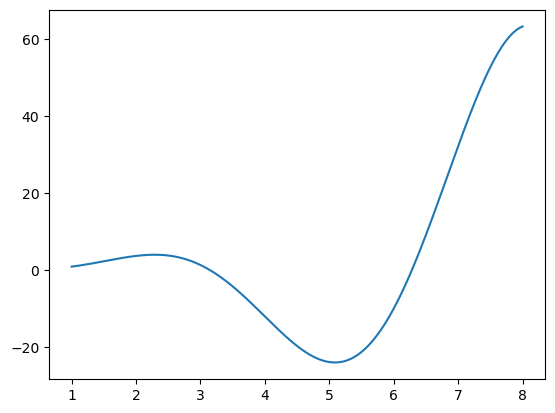

In [6]:
draw_plot(f, x_begin=1, x_end=8)

Теперь напишем алгоритм градиентного спуска.

Напомним, как работает алгоритм градиентной оптимизации:
1. Берем случайную точку $х$ функции $f$ и фиксируем $\alpha$ и $\epsilon$
2. Вычисляем производную $f’(x)$
3. Двигаем $х$: $x_{новое} = x - \alpha⋅f’(x) $
4. Повторяем снова начиная с пункта 2 до тех пор, пока $\Delta y = y(x_{новое}) - y(x)$ не станет меньше $\epsilon$ по модулю



Напишем сначала функцию, которая делает 1 шаг градиентного спуска (пункты 2-3 в алгоритме выше)

In [7]:
def gradient_descent_step(f_dash, x, alpha=0.001):
    '''
    функция шага градиентного спуска (пункты 2-3 в алгоритме выше)
    вход:
        f: функция, для которой реализуем градиентный спуск
        f_dash: функция — производная функции f
        x: текущее значение координаты х
        alpha: значение множителя производной для шага градиентного спуска
    выход:
        x_new: новое значение координаты х после шага градиентного спуска
    '''
    # вычислим значение производной функции в текущей точке х
    f_dash_x = f_dash(x)
    # вычислим значение delta x как альфа умножить на производную
    delta_x = alpha*f_dash_x
    # сделаем шаг градиентного спуска: перейдем в новое значение х
    x_new = x - delta_x

    return x_new


In [8]:
gradient_descent_step(f_dash, 2, alpha=0.1)

1.8027397638885843

In [9]:
from IPython.display import clear_output

# функция для отрисовки графика и движения точки по мере работы алгоритма
def draw_plot(f, x_begin, x_end, xs, ys):
    '''
    функция для визуализации алгоритма градиентного спуска
    вход:
        f: функция, для которой реализуем градиентный спуск
        x_begin, x_end: График функции f будет отрисовываться для значений х от x_begin до x_end
        xs: координаты х, которые мы посетили во время работы градиентного спуска
        ys: координаты y, соответствующие координатам из xs
    '''

    # отрисовка графика функции
    x_ = np.linspace(x_begin, x_end, 1000)
    plt.plot(x_, f(x_))

    # отрисовка точек массивов хs и ys.
    # Это точки, которые мы прошли до текущего момента.
    plt.scatter(xs, ys)
    # подписываем последнюю посещенную точку
    plt.annotate(' x = {}, y = {}'.format(round(xs[-1], 1), round(ys[-1], 1)), (xs[-1], ys[-1]))

    # подписываем график
    plt.title("f(x)")

    plt.show()

    clear_output(wait=True)

In [15]:
def gradient_descent(f, f_dash, x, alpha=0.001, epsilon=0.01):
    '''
    функция, реализующая градиентный спуск (все шаги алгоритма)
    вход:
        f: функция, для которой реализуем градиентный спуск
        f_dash: функция — производная функции f
        x: начальное значение координаты х
        alpha: значение множителя производной для шага градиентного спуска
        epsilon: если х изменился меньше, чем на epsilon, останавливаем алгоритм
    '''

    # получим начальное значение функции y
    y = f(x)

    # массивы, куда будем записывать координаты х и y
    # на каждом шаге работы алгоритма
    xs = [x]
    ys = [y]

    while True:
        # шаг градиентного спуска: получаем новую координату х
        x = gradient_descent_step(f_dash, x, alpha)

        # вычисляем значение функции в новой точке
        y = f(x)

        # вычисляем изменение значения функции y
        previous_y = ys[-1]

        delta_y = np.abs(y - previous_y)

        # запоминаем новые значения х и y
        xs.append(x)
        ys.append(y)


        # вывод информации об изменениях х и y по мере работы алгоритма
        print("Текущий х: {}, текущий y: {}".format(x, y))
        print("Разница двух последних y: {}".format(y, previous_y))


        # завершаем алгоритм, если изменение значения функции стало очень мало
        if delta_y < epsilon:
                break



Зададим значения $\alpha$ и $\epsilon$:

In [12]:
alpha = 0.005
epsilon = 0.001

И начальное значение координаты х, из которой мы будем искать минимум с помощью градиентного спуска:

In [13]:
x = 2.5

И запустим градиентный спуск:

In [16]:
gradient_descent(f, f_dash, x, alpha, epsilon)

Текущий х: 2.5100739343832426, текущий y: 3.7196170000760804
Разница двух последних y: 3.7196170000760804
Текущий х: 2.520681733760468, текущий y: 3.696511416743356
Разница двух последних y: 3.696511416743356
Текущий х: 2.53185643232316, текущий y: 3.6708644867919094
Разница двух последних y: 3.6708644867919094
Текущий х: 2.543633503727008, текущий y: 3.642371418907018
Разница двух последних y: 3.642371418907018
Текущий х: 2.5560510682109636, текущий y: 3.610687294072976
Разница двух последних y: 3.610687294072976
Текущий х: 2.5691501178124967, текущий y: 3.57542130246692
Разница двух последних y: 3.57542130246692
Текущий х: 2.5829747608299023, текущий y: 3.5361300976751124
Разница двух последних y: 3.5361300976751124
Текущий х: 2.597572486563042, текущий y: 3.492310130684152
Разница двух последних y: 3.492310130684152
Текущий х: 2.6129944511532224, текущий y: 3.4433888065872567
Разница двух последних y: 3.4433888065872567
Текущий х: 2.6292957850065406, текущий y: 3.3887142859397916
Ра